<a href="https://colab.research.google.com/github/monic-rabelo/imersao-dados-python-alura/blob/main/aula_dados_python_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 1 - Análise de Dados com Pandas

In [ ]:
# importando biblioteca pandas (de analise de dados)
import pandas as pd

In [ ]:
# importando a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
# lendo a base com o banco de dados
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
# traz informações sobre os formatos dos dados, detalhes e etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
# descrições da base de dados
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
# atributo para mostrar a dimensão do arquivo (quantidade de linhas e numero de colunas.)
df.shape

(133349, 11)

In [ ]:
# variaveis para armazenar as linhas e colunas
linhas, colunas = df.shape[0], df.shape [1]
print("Linhas:", linhas) # imprimir as linhas que foram armazenadas na variavel linha
print("Colunas:", colunas) # imprimir as colunas que foram armazenada na variavel colunas

Linhas: 133349
Colunas: 11


In [ ]:
# mostra os nomes das colunas.
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Dicionário para mapear os nomes das colunas em inglês para português
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Renomeia as colunas do dataframe usando o dicionário
df = df.rename(columns=renomear_colunas)

df.columns # Exibe os novos nomes das colunas para verificar a tradução


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
# metodo para calcular a frequencia de cada categoria na coluna senioridade.
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
# metodo para calcular a frequencia de cada categoria na coluna contrato.
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
# metodo para calcular a frequencia de cada categoria na coluna remoto.
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
# metodo para calcular a frequencia de cada categoria na coluna tamanho empresa.
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
# Mapear as categorias da coluna 'senioridade' para português
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# Substituir os valores na coluna 'senioridade'
df['senioridade'] = df['senioridade'].replace(senioridade)

df['senioridade'].value_counts() # Exibir a contagem dos novos valores para verificar a tradução

,count
senioridade,
Sênior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
# Mapear as categorias da coluna 'contrato' para português
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

# Substituir os valores na coluna 'contrato'
df['contrato'] = df['contrato'].replace(contrato)

df['contrato'].value_counts() # Exibir a contagem dos novos valores para verificar a tradução

,count
contrato,
Tempo Integral,132563
Contrato,394
Meio Período,376
Freelancer,16


In [ ]:
# Mapear as categorias da coluna 'remoto' para português
remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}

# Substituir os valores na coluna 'remoto'
df['remoto'] = df['remoto'].replace(remoto)

df['remoto'].value_counts() # Exibir a contagem dos novos valores para verificar a tradução

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
# Mapear as categorias da coluna 'tamanho_empresa' para português
tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

# Substituir os valores na coluna 'tamanho_empresa'
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

df['tamanho_empresa'].value_counts() # Exibir a contagem dos novos valores para verificar a tradução

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
# mostrar a base agora traduzida
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# mostra as descrições do arquivo mas com valores categoricos - não numericos
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
# mostra as descrições dos arquivos - númericas
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


## Aula 2 - Preparação e Limpeza de dados

In [ ]:
# mostra onde tem dados nulos - false (nao tem), true (tem)
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# mostrando as primeiras linhas do df
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# somando o que é nulo em cada variavel
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
# mostra os valores unicos da coluna - nan sao os valores nulos
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
# exibir as linhas com os anos nulos
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
# importando biblioteca para manipulação númerica
import numpy as np

# criando um novo dataframe
df_salarios = pd.DataFrame({
  'nome': ["Ana", "Bruno", "Daniele", "Carlos", "Val"], #criando as colunas e linhas
  'salario': [4000, np.nan, 5000, np.nan, 100000] # np.nan se trata de um valor NULO, feito com o uso da biblioteca.

})

# criando uma nova coluna com a media dos salario usando fillna para preencher os em nulo e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# criando uma nova coluna com a mediana dos salario usando fillna para preencher os em nulo
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios # exibir o dataframe para ver o resultado

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Daniele,5000.0,5000.00,5000.0
3,Carlos,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
# novo dataframe com temperaturas
df_temperaturas = pd.DataFrame ({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"], # criando as colunas e linhas
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill() # criando uma nova coluna com o valor ANTERIOR nas linhas nulas usando ffill
df_temperaturas  # exibindo o dataframe

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
# novo dataframe com temperaturas
df_temperaturas = pd.DataFrame ({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"], # criando as colunas e linhas
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

# criando uma nova coluna com o valor POSTERIOR nas linhas nulas usando bfill
df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
# exibindo o dataframe
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
# criando um novo dataframe para cidades
df_cidades = pd.DataFrame ({
    'nome': ["Ana", "Bruno", "Daniele", "Carlos", "Val"], # criando as colunas e linhas
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

# criando uma nova coluna para preencher os nulos com fillna deixando como "Não informado"
df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades # exibindo a coluna nova com as cidades preenchidas com não informado

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Daniele,Curitiba,Curitiba
3,Carlos,NaN,Não informado
4,Val,Belém,Belém


In [ ]:
# criando um novo dataframe sem os valores nulos com dropna
df_limpo = df.dropna()

In [ ]:
# exibindo a soma do que é nulo em cada coluna
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
# exibindo as primeiras colunas e linhas
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# exibindo as informações do tipo de dados das colunas - verificando se ano é int ou float
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
# alterando a coluna ano para o tipo int
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))

## Aula 3 - Visualização de Dados

In [ ]:
# visualizando o dataframe df_limpo para criar os graficos
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# plotar: representar graficamente um conjunto de dados.

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

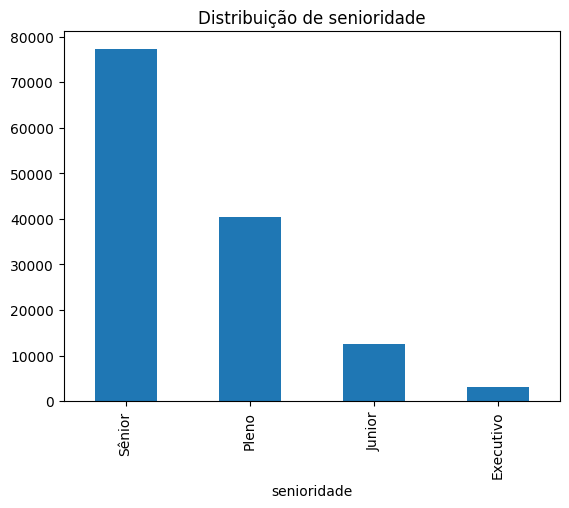

In [ ]:
# vendo a frequencia da coluna e plotando em grafico usando o tipo barras (bar) e dando um titulo.
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [ ]:
# importando biblioteca de visualização de dados
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

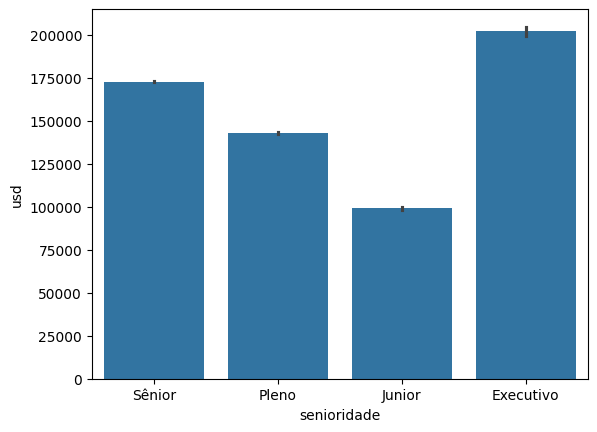

In [ ]:
# plotando um grafico de barras do dataframe df_limpo e o eixo senioridade e usd
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [ ]:
# importando biblioteca de visualização de dados e para definir o tamanho de maneira mais simples
import matplotlib.pyplot as plt

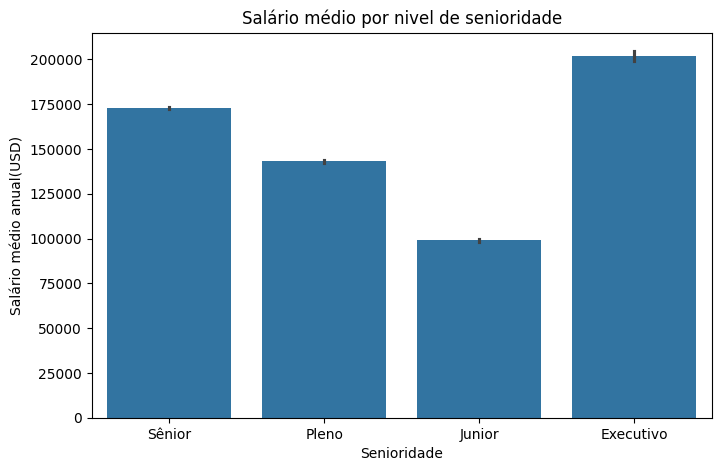

In [ ]:
plt.figure(figsize=(8,5)) # definindo as figuras e tamanho que serao geradas - altura e largura
sns.barplot(data=df_limpo, x='senioridade', y='usd') # gerando um grafico de barras
plt.title("Salário médio por nivel de senioridade") # titulo do grafico
plt.xlabel("Senioridade") # titulo/rotulo do eixo x
plt.ylabel("Salário médio anual(USD)") # titulo/rotulo do eixo y
plt.show() # mostrar o grafico

In [ ]:
# agrupando pelo valor medio de usd para a coluna senioridade e em ordem decrescente (ascending False)
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
# salvando o codigo anterior numa variavel - index mostra a ordem de cada linha
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
# verificando a ordem
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

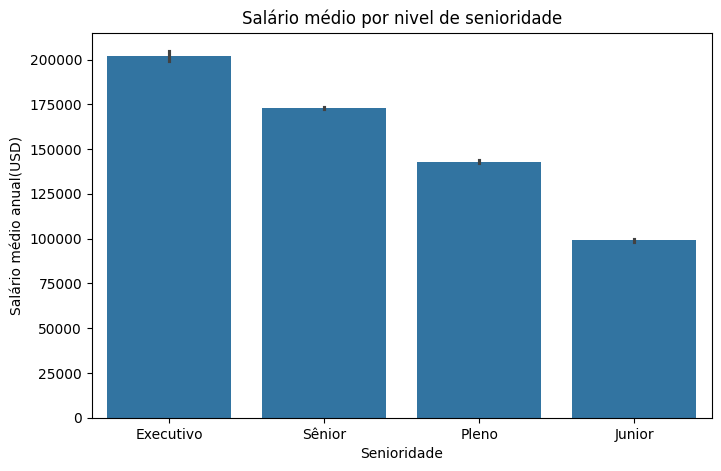

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem) # usando os parametros da variavel ordem e gerando um grafico de barras
plt.title("Salário médio por nivel de senioridade") # titulo do grafico
plt.xlabel("Senioridade") # titulo/rotulo do eixo x
plt.ylabel("Salário médio anual(USD)") # titulo/rotulo do eixo y
plt.show() # mostrar o grafico

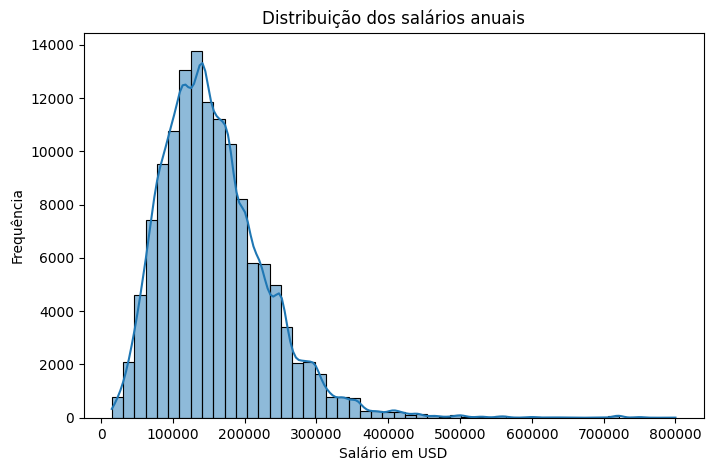

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True) # criando um histograma com a coluna usd para mostrar a frequência, parametros bins para intervalos
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD") # titulo/rotulo do eixo x
plt.ylabel("Frequência") # titulo/rotulo do eixo y
plt.show() # mostrar o grafico

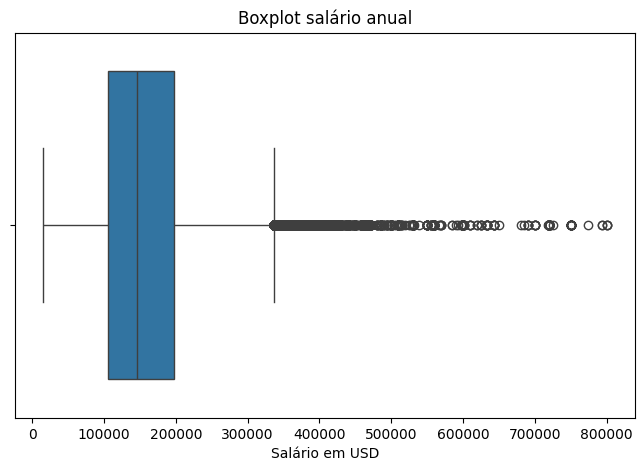

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd']) # criando um gráfico de caixa com a coluna usd
plt.title("Boxplot salário anual")
plt.xlabel("Salário em USD") # titulo/rotulo do eixo x
plt.show() # mostrar o grafico

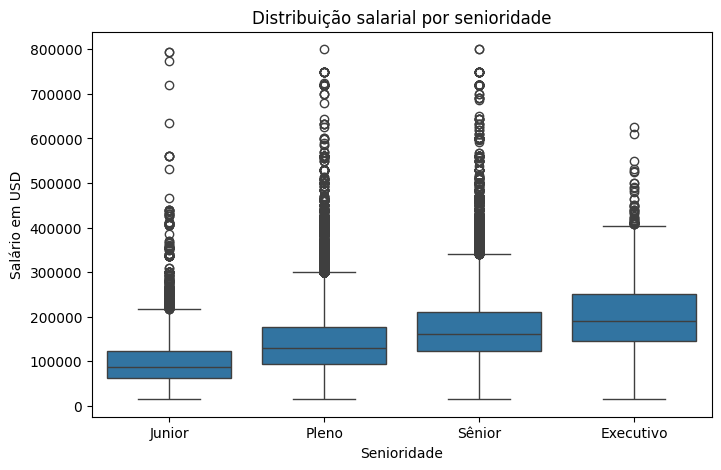

In [ ]:
# criando uma ordem de senioridade
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade) # criando um gráfico de caixa com as colunas senioridade e usd e ordenando pela ordem declarada anteriormente
plt.title("Distribuição salarial por senioridade")
plt.xlabel("Senioridade") # titulo/rotulo do eixo x
plt.ylabel("Salário em USD") # titulo/rotulo do eixo y
plt.show() # mostrar o grafico

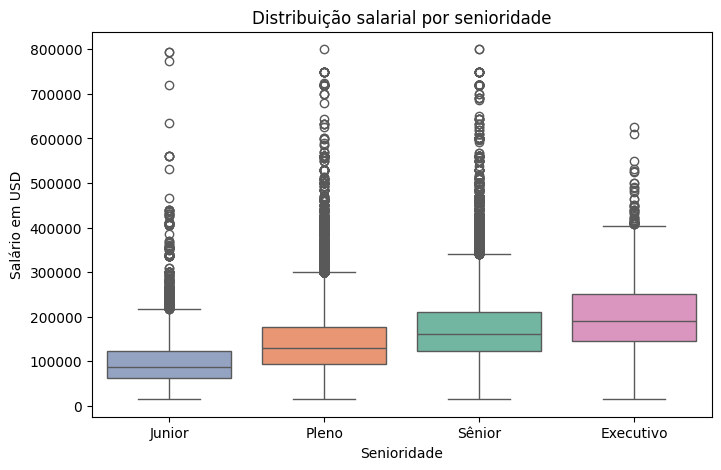

In [ ]:
# criando uma ordem de senioridade
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade') # colocando cores nos graficos e em qual categoria pelo hue
plt.title("Distribuição salarial por senioridade")
plt.xlabel("Senioridade") # titulo/rotulo do eixo x
plt.ylabel("Salário em USD") # titulo/rotulo do eixo y
plt.show() # mostrar o grafico

In [ ]:
# importando biblioteca para gerar graficos interativos
import plotly.express as px

In [ ]:
# Calcula a média salarial por nível de senioridade, ordena e reseta o index
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario, # Cria um gráfico de barras interativo usando Plotly Express
             x='senioridade', # Define a coluna 'senioridade' para o eixo x
             y='usd', # Define a coluna 'usd' para o eixo y (média salarial)
             title='Média Salarial por Nível de Senioridade', # Define o título do gráfico
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial Anual (USD)'}) # Define rótulos personalizados para os eixos

fig.show() # Exibe o gráfico

In [ ]:
# Conta a frequência de cada categoria na coluna 'remoto' e reseta o index
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
# Definindo as colunas da categoria
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem, # Cria um gráfico de barras interativo usando Plotly Express
             names='tipo_trabalho', # Define a coluna 'tipo_trabalho' para os nomes dos fatias
             values='quantidade', # Define a coluna 'quantidade' para os valores
             title='Proporção para os tipos de trabalho', # Define o título do gráfico
             hole=0.5) # Tamanho do buraco do meio do gráfico

# Coloca o nome e a porcentagem juntos
fig.update_traces(textinfo='percent+label')

fig.show() # Exibe o gráfico

In [ ]:
# verificando as siglas dos paises
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# instalando biblioteca para converter as siglas em duas letras para 3 (USA, AUS, BRA)
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.6 MB/s eta 0:00:00


In [ ]:
# importando a biblioteca para as siglas
import pycountry

In [ ]:
# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [ ]:
# verificando a nova coluna residencia_iso3 com as 3 letras na sigla dos países
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [ ]:
df_limpo.to_csv("dados-imersao-alura.csv", index = False)